<a href="https://colab.research.google.com/github/anjaleeDS/DAT6-git-lab/blob/master/AnimalCrossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
import altair as alt
pd.set_option('display.max_colwidth', None)

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd My\ Drive/Colab \Notebooks

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
/gdrive/My Drive/Colab Notebooks


In [0]:
df_items = pd.read_csv('ACitems.csv')
df_villagers = pd.read_csv('ACvillagers.csv')
df_items.columns
# df_items.groupby(['buy_currency']).mean()
# mile_goods = df_items.loc[df_items['buy_currency']=="miles"]
# df_items['image_url']

Index(['num_id', 'id', 'name', 'category', 'orderable', 'sell_value',
       'sell_currency', 'buy_value', 'buy_currency', 'sources', 'customizable',
       'recipe', 'recipe_id', 'games_id', 'id_full', 'image_url'],
      dtype='object')

In [0]:
df_villagers.head(4)
# df_villagers.groupby(['species']).count()
#herbavores vs carnivores?


row_n  ...                                                                url
0      2  ...  https://villagerdb.com/images/villagers/thumb/admiral.98206ee.png
1      3  ...  https://villagerdb.com/images/villagers/thumb/agent-s.96c789b.png
2      4  ...    https://villagerdb.com/images/villagers/thumb/agnes.9f51f32.png
3      6  ...       https://villagerdb.com/images/villagers/thumb/al.1e17090.png

[4 rows x 11 columns]

In [0]:
# can mile purchased goods be sold for bells? and for how much?
mile_goods = df_items.loc[df_items['buy_currency']=="miles"]

alt.Chart(mile_goods).mark_point().encode(
  alt.X('buy_value', scale=alt.Scale(zero=False)),
  alt.Y('sell_value', scale=alt.Scale(zero=False)),
  tooltip=['name', 'buy_value', 'sell_value'],
  url='image_url'
  # color='category',
).interactive()

alt.Chart(...)

In [0]:
# source = pd.DataFrame.from_records([
#       {"x": 0.5, "y": 0.5, "img": "https://vega.github.io/vega-datasets/data/ffox.png"},
#       {"x": 1.5, "y": 1.5, "img": "https://vega.github.io/vega-datasets/data/gimp.png"},
#       {"x": 2.5, "y": 2.5, "img": "https://vega.github.io/vega-datasets/data/7zip.png"}
# ])

# alt.Chart(source).mark_image(
#     width=50,
#     height=50
# ).encode(
#     x='x',
#     y='y',
#     url='img'
# ).interactive()
source

x    y                                                 img
0  0.5  0.5  https://vega.github.io/vega-datasets/data/ffox.png
1  1.5  1.5  https://vega.github.io/vega-datasets/data/gimp.png
2  2.5  2.5  https://vega.github.io/vega-datasets/data/7zip.png

In [0]:
df_mile = mile_goods[['name','buy_value', 'sell_value', 'image_url']]
# df_mile['url'] = df_mile['img']
# df_mile['url_formatted'] = df_mile.loc[:,'image_url'].str.replace('http', '"http', regex=True)
# df_mile['url_formatted'] = df_mile.loc[:,'url_formatted'].str.replace('png', 'png"', regex=True)
df_mile.head(4)

name  ...                                                                  image_url
2707    Nook Inc. Aloha Shirt  ...  https://villagerdb.com/images/items/full/nook-inc-aloha-shirt.c1667a9.png
2708       Nook Inc. Bandanna  ...     https://villagerdb.com/images/items/full/nook-inc-bandanna.37cb7dc.png
2709        Nook Inc. Blouson  ...      https://villagerdb.com/images/items/full/nook-inc-blouson.bdafaa3.png
2710  Nook Inc. Botanical Rug  ...                                                                        NaN

[4 rows x 4 columns]

In [0]:
# df_mile.isnull().count()
df_mile['image_url'].replace(np.nan, "https://vega.github.io/vega-datasets/data/7zip.png", inplace=True)
df_mile['buy_value'].replace(np.nan, '0', inplace=True)
df_mile['sell_value'].replace(np.nan, '0', inplace=True)

alt.Chart(df_mile).mark_image(
    width=100,
    height=100,
).encode(
  # alt.X('buy_value', scale=alt.Scale(zero=False)),
  # alt.Y('sell_value', scale=alt.Scale(zero=False)),
  x='buy_value:Q',
  y='sell_value:Q',
  href = 'image_url:N',
  url=r'image\_url:N',
  tooltip = ['name:N',r'image\_url:N'],
).interactive()



/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



alt.Chart(...)

In [0]:
# what to sell that would make money which are not orderable?
selection = alt.selection_interval(bind='scales')

one = alt.Chart(df_items).mark_point().encode(
    alt.X('sell_value', scale=alt.Scale(zero=False)),
    alt.Y('buy_value', scale=alt.Scale(zero=False)),
    color='orderable',
    shape='orderable',
    href='image_url',
    tooltip=['name','image_url'],
).interactive()

two = alt.Chart(df_items).mark_point().encode(
    alt.X('category'),
    alt.Y('sell_value'),
    shape='orderable',
    tooltip=['name', 'orderable']
).add_selection(
    selection
).interactive(
)

one|two

alt.HConcatChart(...)

In [0]:
# Brush for selection
brush = alt.selection(type='interval')
selector = alt.selection_single(empty='all', fields=['customizable'])

# base = alt.Chart(df_items).properties(
#     width=250,
#     height=250
# ).add_selection(selector)

# Scatter Plot
points = alt.Chart(df_items).mark_point().encode(
    x='buy_value:Q',
    y='sell_value:Q',
    color=alt.condition(brush, 'customizable:N', alt.value('grey')),
    tooltip=['name','image_url'],
).add_selection(brush)


bars = alt.Chart(df_items).mark_bar().encode(
    y='category:N',
    color='category:N',
    x='count(category):Q'
).transform_filter(
    brush
)


points | bars


alt.HConcatChart(...)

In [0]:
source = mile_goods

stripplot = alt.Chart(source, width=100).mark_circle(size=80).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('sell_value:Q',scale=alt.Scale(zero=False)),
    color=alt.Color('category:N', legend=None),
    column=alt.Column(
        'category:N',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=3,
        ),
    ),
    href='image_url',
    tooltip=['name','image_url'],
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
).interactive()

stripplot

alt.Chart(...)

In [0]:
df_items.columns

Index(['num_id', 'id', 'name', 'category', 'orderable', 'sell_value',
       'sell_currency', 'buy_value', 'buy_currency', 'sources', 'customizable',
       'recipe', 'recipe_id', 'games_id', 'id_full', 'image_url'],
      dtype='object')

In [0]:
import altair as alt
from vega_datasets import data

source = data.movies.url

stripplot =  alt.Chart(source, width=40).mark_circle(size=8).encode(
    x=alt.X(
        'jitter:Q',
        title=None,
        axis=alt.Axis(values=[0], ticks=True, grid=False, labels=False),
        scale=alt.Scale(),
    ),
    y=alt.Y('IMDB_Rating:Q'),
    color=alt.Color('Major_Genre:N', legend=None),
    column=alt.Column(
        'Major_Genre:N',
        header=alt.Header(
            labelAngle=-90,
            titleOrient='top',
            labelOrient='bottom',
            labelAlign='right',
            labelPadding=3,
        ),
    ),
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter='sqrt(-2*log(random()))*cos(2*PI*random())'
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

stripplot

alt.Chart(...)

In [0]:

# selection = alt.selection_interval(bind='scales')
input_dropdown = alt.binding_select(options=df_items.category.unique())
selection = alt.selection_single(bind=input_dropdown)

alt.Chart(df_items).mark_point().encode(
    x='buy_value:Q',
    y='sell_value:Q',
    row='buy_currency:N',
    tooltip=['name:N', 'buy_value:N', 'sell_value:N'],
    color='orderable:N',
    shape='customizable:N',
).add_selection(
    selection
).interactive()

alt.Chart(...)

In [0]:
df_items.sources.value_counts()

In [0]:
df_items['s2b']=df_items['sell_value']/df_items['buy_value']
df_items['b2s']=df_items['buy_value']/df_items['sell_value']

selection = alt.selection_interval(bind='scales')


buy = alt.Chart(df_items).mark_point().encode(
    y='category:N',
    x='s2b:Q',
    tooltip=['name:N', 'buy_value:Q']
).add_selection(selection)

sell = alt.Chart(df_items).mark_point().encode(
    y='category:N',
    x='b2s:Q',
    tooltip=['name:N', 'sell_value:Q']
).add_selection(selection)

buy | sell

alt.HConcatChart(...)

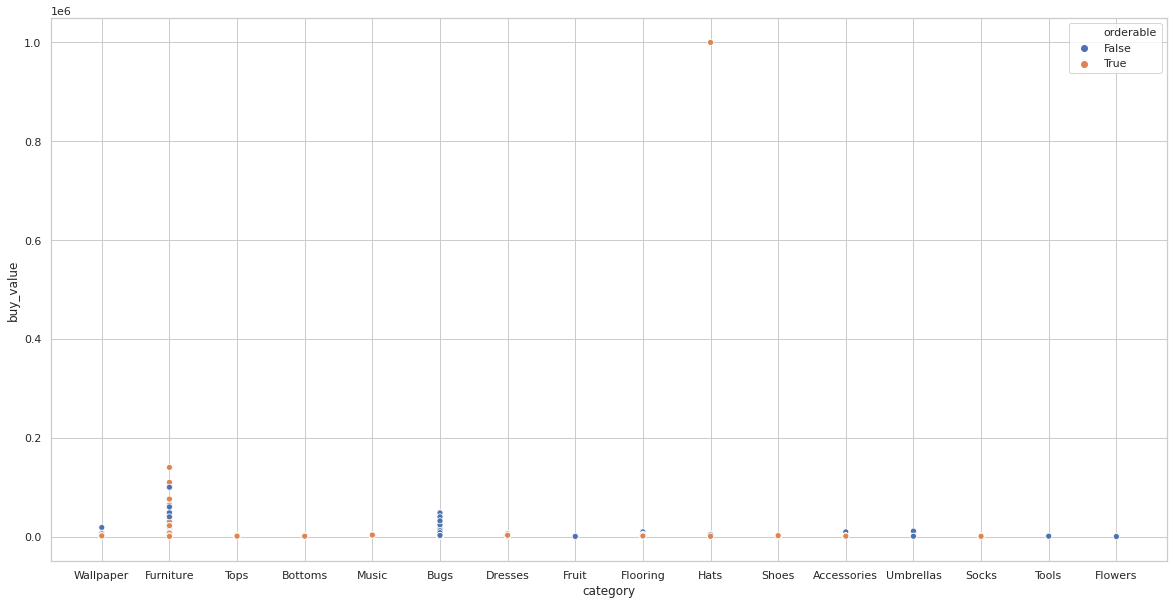

In [0]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,10))

sns.scatterplot(data=df, x='category', y='buy_value',hue='orderable')
